In [2]:
using Plots
pythonplot()
# using PyPlot
using JLD2 
using LinearAlgebra
using LaTeXStrings
using CurveFit
using Statistics


# include("../../Helpers/FermionAlgebra.jl");
# using .FermionAlgebra;

include("../../Hamiltonians/H2.jl")
using .H2

include("../../Hamiltonians/H4.jl")
using .H4

include("../../Hamiltonians/Hgoe.jl")
using .Hgoe

include("../../Helpers/ChaosIndicators/ChaosIndicators.jl");
using .ChaosIndicators;

include("../../Helpers/OperationsOnHamiltonian.jl");
using .OperationsOnH



Function saves normalization for each L in JLD2 file.

In [8]:
function GetNormalizationData(L′s:: Vector{Int}, maxNumbOfIter:: Int64, namespace:: Module)
    numericalNorm = zeros(Float64, (length(L′s), maxNumbOfIter));

    for (l, L) in enumerate(L′s)
        println("\nline L: ", L);
        for i=1:maxNumbOfIter
            if mod(i,100)==0
                print(" ", round(i/maxNumbOfIter *100, digits=2), "%..." );
            end
            params = namespace.Params(L);
            H₂ = namespace.Ĥ(params);

            numericalNorm[l,i] = OperationsOnH.OperatorNorm(H₂);
        end

        numericalNormByIteration = [ sum(numericalNorm[l,1:i])/i for i in 1:maxNumbOfIter ]

        folder = jldopen("./Data/Norm_$(namespace)_L$(L)_$(maxNumbOfIter)-Normalization.jld2", "w");
        folder["numericalNorm"] = numericalNorm[l,:];
        folder["numericalNormByIteration"] = numericalNormByIteration;
        close(folder);

    end
    
end

GetNormalizationData (generic function with 1 method)

In [10]:
L′s = [4,6,8,10];
maxNumbOfIter = 5000;
namespace = H2;

GetNormalizationData(L′s, maxNumbOfIter, namespace)



line L: 4
 

2.0%...

 4.0%... 

6.0%... 8.0%... 

10.0%...

 12.0%... 

14.0%... 16.0%... 18.0%...

 20.0%... 22.0%...

 24.0%... 26.0%...

 28.0%... 30.0%... 32.0%... 

34.0%... 36.0%... 38.0%...

 40.0%... 42.0%... 44.0%... 

46.0%... 48.0%... 

50.0%...

 52.0%... 54.0%... 56.0%... 

58.0%... 60.0%... 62.0%...

 64.0%... 66.0%... 68.0%... 

70.0%... 72.0%... 

74.0%... 76.0%... 78.0%...

 80.0%... 82.0%... 84.0%... 

86.0%... 88.0%... 90.0%...

 92.0%... 94.0%... 96.0%... 

98.0%... 100.0%...
line L: 

6


 2.0%... 

4.0%...

 6.0%... 

8.0%...

 10.0%... 

12.0%...

 14.0%... 

16.0%...

 18.0%... 

20.0%...

 22.0%... 

24.0%...

 26.0%... 

28.0%...

 30.0%... 

32.0%...

 34.0%... 

36.0%...

 38.0%... 

40.0%...

 42.0%... 

44.0%...

 46.0%... 

48.0%...

 50.0%... 

52.0%...

 54.0%... 

56.0%...

 58.0%... 

60.0%...

 62.0%... 

64.0%...

 66.0%... 

68.0%...

 70.0%... 

72.0%...

 74.0%... 

76.0%...

 78.0%... 

80.0%...

 82.0%... 

84.0%...

 86.0%... 

88.0%...

 90.0%... 

92.0%...

 94.0%... 

96.0%...

 98.0%... 

100.0%...


line L: 8
 

2.0%...

 4.0%... 

6.0%...

 8.0%... 

10.0%...

 12.0%... 

14.0%...

 16.0%... 

18.0%...

 20.0%... 

22.0%...

 24.0%... 

26.0%...

 28.0%... 

30.0%...

 32.0%... 

34.0%...

 36.0%... 

38.0%...

 40.0%... 

42.0%...

 44.0%... 

46.0%...

 48.0%... 

50.0%...

 52.0%... 

54.0%...

 56.0%... 

58.0%...

 60.0%... 

62.0%...

 64.0%... 

66.0%...

 68.0%... 

70.0%...

 72.0%... 

74.0%...

 76.0%... 

78.0%...

 80.0%... 

82.0%...

 84.0%... 

86.0%...

 88.0%... 

90.0%...

 92.0%... 

94.0%...

 96.0%... 

98.0%...

 100.0%...
line L: 

10


 2.0%... 

4.0%...

 6.0%... 

8.0%...

 10.0%... 

12.0%...

 14.0%... 

16.0%...

 18.0%... 

20.0%...

 22.0%... 

24.0%...

 26.0%... 

28.0%...

 30.0%... 

32.0%...

 34.0%... 

36.0%...

 38.0%... 

40.0%...

 42.0%... 

44.0%...

 46.0%... 

48.0%...

 50.0%... 

52.0%...

 54.0%... 

56.0%...

 58.0%... 

60.0%...

 62.0%... 

64.0%...

 66.0%... 

68.0%...

 70.0%... 

72.0%...

 74.0%... 

76.0%...

 78.0%... 

80.0%...

 82.0%... 

84.0%...

 86.0%... 

88.0%...

 90.0%... 

92.0%...

 94.0%... 

96.0%...

 98.0%... 

100.0%...

In [4]:
L′s = [4,6,8,10,12];
maxNumbOfIter = 5000;
namespace = H4

# GetNormalizationData(L′s, maxNumbOfIter, namespace)


Main.H4

In [5]:
L′s = [4,6,8,10];
maxNumbOfIter = 1000;
namespace = Hgoe

# GetNormalizationData(L′s, maxNumbOfIter, namespace)


Main.Hgoe

Function plots normalization for given parameters

In [31]:
function PlotNormalizationData(L′s, maxNumbOfIter, namespace)
    normAsFunctionOfIterations1 = plot( 
        yscale=:log10, 
        minorgrid=true, 
        framestyle = :box, 
        legend=:topleft, 
        # title = "Convergency of normalization error, w.r.t. last value", 
        xtickfont=font(12), 
        ytickfont=font(12), 
        guidefont=font(10), 
        legendfont=font(10)
    );
    normAsFunctionOfIterations2 = plot( 
        yscale=:log10, 
        minorgrid=true, 
        framestyle = :box, 
        legend=:topleft, 
        # title = "Convergency of normalization error, w.r.t. last value", 
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10)
    );
    normAsFunctionOfSystemSize = plot(  
        yscale = :log10,
        framestyle = :box,
        # title="Normalization error",
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10),
    );

    normaOfL = Vector{Float64}(undef, length(L′s));


    for (i,L) in enumerate(L′s)
        folder = jldopen("./Data-Normalization/Norm_$(namespace)_L$(L)_$(maxNumbOfIter).jld2", "r");
        numericalNorm = folder["numericalNorm"];
        numericalNormByIteration = folder["numericalNormByIteration"];
        close(folder);

        σ = std(numericalNorm)
        print(round(numericalNormByIteration[end], digits=4), "(1 + ", round(σ/numericalNormByIteration[end], digits=4), ")", " & ")


        normaOfL[i] = abs(numericalNormByIteration[end] .- 1);


        plot!(normAsFunctionOfIterations1, 1:maxNumbOfIter-1, abs.(numericalNormByIteration[1:end-1] .- numericalNormByIteration[end]), lc=colors[i], label="L=$(L)");
        plot!(normAsFunctionOfIterations2, 1:maxNumbOfIter, abs.(numericalNormByIteration .- 1), lc=colors[i], label="L=$(L)");
        scatter!(normAsFunctionOfSystemSize, [L], [abs(numericalNormByIteration[end] .- 1)], yerr= [abs(numericalNormByIteration[end] .- 1)*σ/abs(numericalNormByIteration[end])],  mc=:dodgerblue, label="");
    end

    # ylims!(normAsFunctionOfSystemSize, (0.00001,0.1))

    

    fit = linear_fit(L′s, log10.(normaOfL))
    y10 = fit[1] .+ fit[2] .* L′s;
    y= 10 .^y10
    println(y)
    println(fit)

    plot!(normAsFunctionOfSystemSize, L′s, y, legend=true, label =L"%$(round(fit[1], digits=3))\exp(%$(round(fit[2], digits=3))\;L)", lc=colors[1]);

    xlabel!(normAsFunctionOfIterations1, "Number of Iterations");
    ylabel!(normAsFunctionOfIterations1, L"\vert\vert H_{GOE} \vert\vert - last value");
    xlabel!(normAsFunctionOfIterations2, "Number of Iterations");
    ylabel!(normAsFunctionOfIterations2, L"\delta \vert\vert H_{GOE} \vert\vert");
    xlabel!(normAsFunctionOfSystemSize,  L"L");
    ylabel!(normAsFunctionOfSystemSize, L"\delta \vert\vert H_{GOE} \vert\vert");

    ratio = 3
    dim = 500
    p = plot(normAsFunctionOfIterations1, normAsFunctionOfIterations2, normAsFunctionOfSystemSize, layout=(1,3), size=(Int(dim*ratio),dim))
    savefig(p, "./Images-Normalization/Normalization_$(namespace)_L$(L′s)_$(maxNumbOfIter).pdf")    

end 

PlotNormalizationData (generic function with 1 method)

In [62]:
function PlotNormalizationDataWithVariance(L′s′s, maxNumbOfIter′s)
    normAsFunctionOfSystemSize_H2 = plot(  
        yscale = :log10,
        framestyle = :box,
        # title="Normalization error",
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10),
    );
    normAsFunctionOfSystemSize_H4 = plot(  
        yscale = :log10,
        framestyle = :box,
        # title="Normalization error",
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10),
    );
    normAsFunctionOfSystemSize_Hgoe = plot(  
        yscale = :log10,
        framestyle = :box,
        # title="Normalization error",
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10),
    );


    namespace′s = [H2, H4, Hgoe];
    namespace′s_string = ["H2", "H4", "Hgoe"];
    graphs = [normAsFunctionOfSystemSize_H2, normAsFunctionOfSystemSize_H4, normAsFunctionOfSystemSize_Hgoe];




    for (i, namespace) in enumerate(namespace′s)
        graph = graphs[i]
        L′s = L′s′s[i]
        maxNumbOfIter = maxNumbOfIter′s[i]

        normaOfL = Vector{Float64}(undef, length(L′s)); 
        for (i,L) in enumerate(L′s)
            folder = jldopen("./Data-Normalization/Norm_$(namespace)_L$(L)_$(maxNumbOfIter).jld2", "r");
            numericalNorm = folder["numericalNorm"];
            numericalNormByIteration = folder["numericalNormByIteration"];
            close(folder);

            σ = std(numericalNorm)

            normaOfL[i] = abs(numericalNormByIteration[end] .- 1);
            scatter!(graph, [L], [abs(numericalNormByIteration[end] .- 1)], yerr= [abs(numericalNormByIteration[end] .- 1)*σ/abs(numericalNormByIteration[end])],  mc=:dodgerblue, label="");
        end
        

        fit = linear_fit(L′s, log10.(normaOfL))
        y10 = fit[1] .+ fit[2] .* L′s;
        y= 10 .^y10
        println(y)
        println(fit)

        plot!(graph, L′s, y, legend=true, label =L"%$(round(fit[1], digits=3))\exp(%$(round(fit[2], digits=3))\;L)", lc=colors[1]);
        xlabel!(graph,  L"L");
        # a=split(namespace,".")[2]
        ylabel!(graph, L"\delta \vert\vert H_{ %$(namespace′s_string[i]) } \vert\vert");
        title!(graph, "Število iteracij = $(maxNumbOfIter)")

    end

    ratio = 3
    dim = 500
    p = plot(normAsFunctionOfSystemSize_H2, normAsFunctionOfSystemSize_H4, normAsFunctionOfSystemSize_Hgoe, layout=(1,3), size=(Int(dim*ratio),dim))
    savefig(p, "./Images-Normalization/NormalizationWithVariance_$(namespace)_L$(L′s)_$(maxNumbOfIter).pdf")    

end 

PlotNormalizationDataWithVariance (generic function with 1 method)

In [97]:
function PlotNormalizationWithRespectToHilberDimension(L′s′s, maxNumbOfIter′s)
    normAsFunctionOfSystemSize_H2 = plot(  
        yscale = :log10,
        xscale = :log10,
        framestyle = :box,
        # title="Normalization error",
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10),
    );
    normAsFunctionOfSystemSize_H4 = plot(  
        yscale = :log10,
        xscale = :log10,
        framestyle = :box,
        # title="Normalization error",
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10),
    );
    normAsFunctionOfSystemSize_Hgoe = plot(  
        yscale = :log10,
        xscale = :log10,
        framestyle = :box,
        # title="Normalization error",
        xtickfont=font(10), 
        ytickfont=font(10), 
        guidefont=font(10), 
        legendfont=font(10),
    );


    namespace′s = [H2, H4, Hgoe];
    namespace′s_string = ["H2", "H4", "Hgoe"];
    graphs = [normAsFunctionOfSystemSize_H2, normAsFunctionOfSystemSize_H4, normAsFunctionOfSystemSize_Hgoe];




    for (i, namespace) in enumerate(namespace′s)
        graph = graphs[i]
        L′s = L′s′s[i]
        D′s = [binomial(L,L÷2) for L in L′s];
        maxNumbOfIter = maxNumbOfIter′s[i]

        normaOfL = Vector{Float64}(undef, length(L′s)); 
        for (i,L) in enumerate(L′s)
            folder = jldopen("./Data-Normalization/Norm_$(namespace)_L$(L)_$(maxNumbOfIter).jld2", "r");
            numericalNorm = folder["numericalNorm"];
            numericalNormByIteration = folder["numericalNormByIteration"];
            close(folder);

            σ = std(numericalNorm)

            D = binomial(L, L÷2)

            normaOfL[i] = abs(numericalNormByIteration[end] .- 1);
            scatter!(graph, [D], [abs(numericalNormByIteration[end] .- 1)], yerr= [abs(numericalNormByIteration[end] .- 1)*σ/abs(numericalNormByIteration[end])],  mc=:dodgerblue, label="");
        end
        

        fit = power_fit(D′s, normaOfL)
        y10 = fit[1] .* D′s .^ fit[2];
        y= y10
        # println(y)
        println(fit)

        plot!(graph, D′s, y, legend=true, label =L"%$(round(fit[1], digits=3)) \mathcal{D}^{ %$(round(fit[2], digits=3)) }", lc=colors[1]);
        xlabel!(graph,  L"\mathcal{D}");
        # a=split(namespace,".")[2]
        ylabel!(graph, L"\delta \vert\vert H_{ %$(namespace′s_string[i]) } \vert\vert");
        title!(graph, "Število iteracij = $(maxNumbOfIter)")

    end

    ratio = 3
    dim = 500
    p = plot(normAsFunctionOfSystemSize_H2, normAsFunctionOfSystemSize_H4, normAsFunctionOfSystemSize_Hgoe, layout=(1,3), size=(Int(dim*ratio),dim))
    savefig(p, "./Images-Normalization/NormalizationWithRespectToHilberDimensionWithVariance_$(namespace)_L$(L′s)_$(maxNumbOfIter).pdf")    

end 

PlotNormalizationWithRespectToHilberDimension (generic function with 1 method)

(0.03850597344042212, -0.33944202769449133)
(0.03548089304396348, -0.7254113631688025)
(0.04405133663563927, -1.5359954596926388)


sys:1: UserWarning: You passed a edgecolor/edgecolors (<jl [0.0, 0.0, 0.0, 1.0]>) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


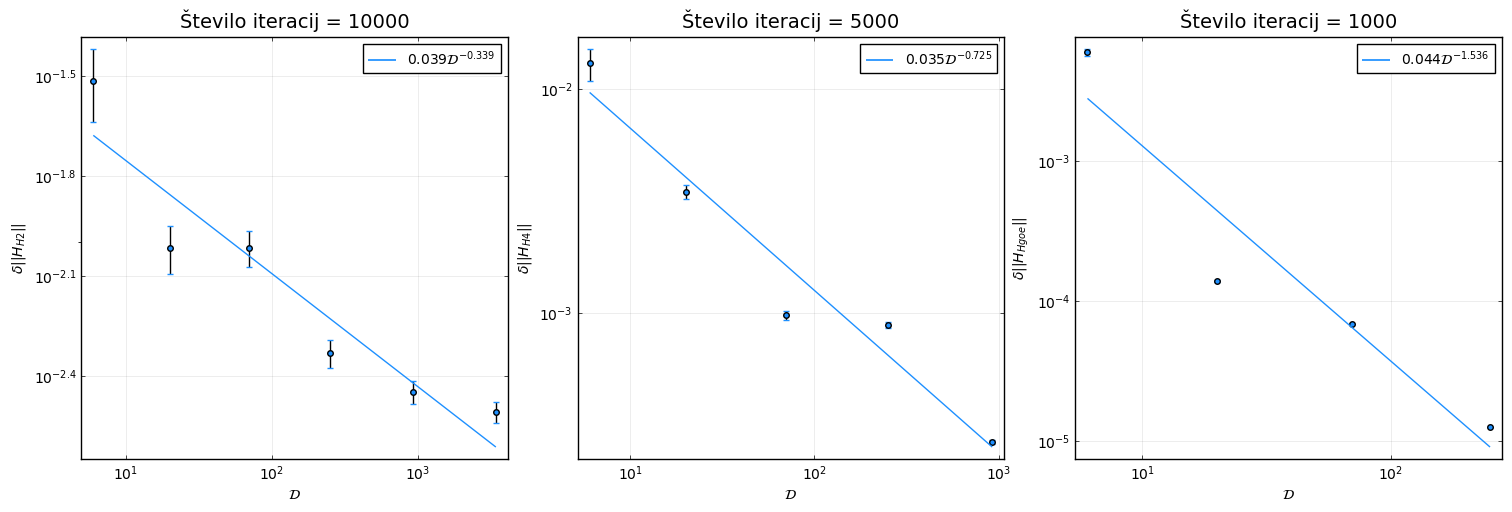

"/Users/rokpintar/Desktop/FAX/MAG 2. /Magisterska naloga/Magisterska-Naloga-Program/MastersDegree/Plotting/Normalization/Images-Normalization/NormalizationWithRespectToHilberDimensionWithVariance_Main.H2_L[4, 6, 8, 10, 12, 14]_10000.pdf"

In [98]:
L′s′s = [[4,6,8,10,12,14], [4,6,8,10,12], [4,6,8,10]];
maxNumbOfIter′s = [10000, 5000, 1000];

PlotNormalizationWithRespectToHilberDimension(L′s′s, maxNumbOfIter′s)

0.9694(1 + 0.2493) & 0.9904(1 + 0.1656) & 0.9904(1 + 0.1233) & 0.9954(1 + 0.0986) & 0.9965(1 + 0.0812) & 0.9969(1 + 0.07) & [0.021411477568088352, 0.013878205594265978, 0.008995389968031588, 0.005830511742122893, 0.0037791432384639387, 0.002449514596402759]
(-1.2927267191776752, -0.09415666065047205)


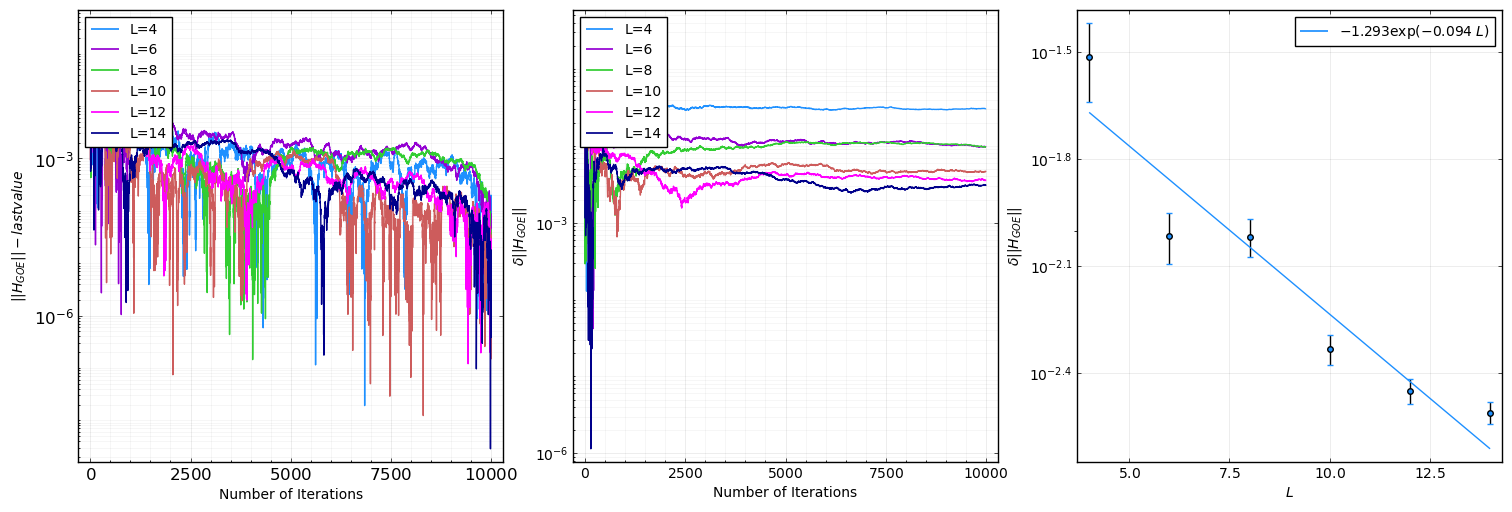

"/Users/rokpintar/Desktop/FAX/MAG 2. /Magisterska naloga/Magisterska-Naloga-Program/MastersDegree/Plotting/Normalization/Images-Normalization/Normalization_Main.H2_L[4, 6, 8, 10, 12, 14]_10000.pdf"

In [32]:
L′s = [4,6,8,10,12,14];
maxNumbOfIter = 10000;
namespace = H2

PlotNormalizationData(L′s, maxNumbOfIter, namespace)

0.987(1 + 0.1644) & 0.9965(1 + 0.0734) & 0.999(1 + 0.0446) & 0.9991(1 + 0.0308) & 0.9997(1 + 0.0223) & [0.009960390620777642, 0.003982265755249212, 0.0015921504636926026, 0.0006365579935731674, 0.0002545023780240722]
(-1.205431366333064, -0.19907306575052586)


sys:1: UserWarning: You passed a edgecolor/edgecolors (<jl [0.0, 0.0, 0.0, 1.0]>) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


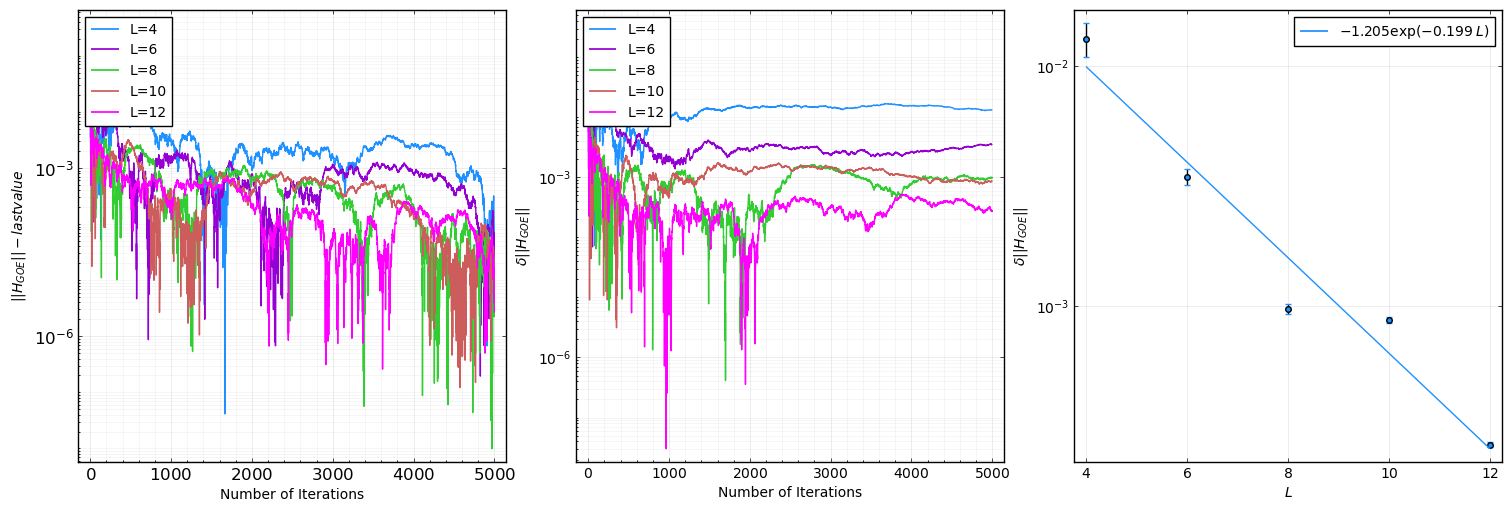

"/Users/rokpintar/Desktop/FAX/MAG 2. /Magisterska naloga/Magisterska-Naloga-Program/MastersDegree/Plotting/Normalization/Images-Normalization/Normalization_Main.H4_L[4, 6, 8, 10, 12]_5000.pdf"

In [23]:
namespace = H4;
L′s = [4,6,8,10,12];
maxNumbOfIter = 5000;

PlotNormalizationData(L′s, maxNumbOfIter, namespace)


0.994(1 + 0.0594) & 0.9999(1 + 0.0156) & 0.9999(1 + 0.0039) & 1.0(1 + 0.001) & [0.0029314307082767554, 0.00042884138421106754, 6.273555513108914e-5, 9.177635420719628e-6]
(-0.8633544793043143, -0.4173914719234467)


sys:1: UserWarning: You passed a edgecolor/edgecolors (<jl [0.0, 0.0, 0.0, 1.0]>) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


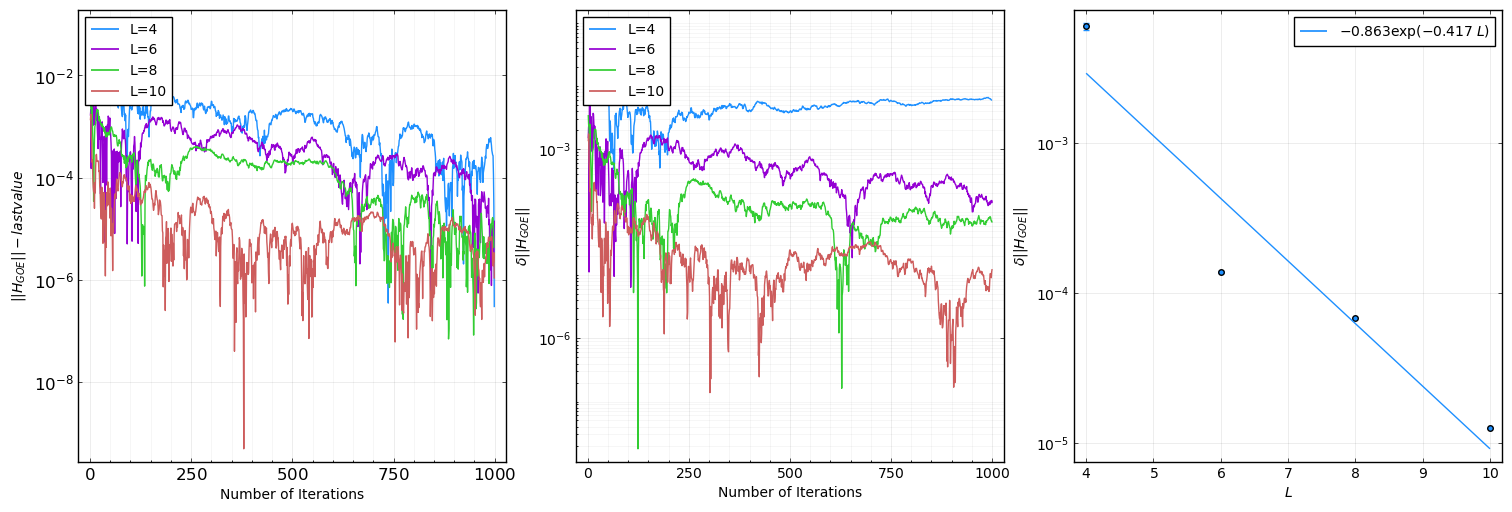

"/Users/rokpintar/Desktop/FAX/MAG 2. /Magisterska naloga/Magisterska-Naloga-Program/MastersDegree/Plotting/Normalization/Images-Normalization/Normalization_Main.Hgoe_L[4, 6, 8, 10]_1000.pdf"

In [24]:
L′s = [4,6,8,10];
maxNumbOfIter = 1000;
namespace = Hgoe

PlotNormalizationData(L′s, maxNumbOfIter, namespace)


In [10]:
function JoinTwoNormalizationFiles(L′s, maxNumbOfIter1, maxNumbOfIter2, namespace)
    
    for L in L′s
        folder1 = jldopen("./Data/Norm_$(namespace)_L$(L)_$(maxNumbOfIter1).jld2", "r");
        numericalNorm1 = folder1["numericalNorm"];
        numericalNormByIteration2 = folder1["numericalNormByIteration"];
        close(folder1);
        
        # folder2 = jldopen("./Data/Norm_$(namespace)_L$(L)_$(maxNumbOfIter2)_true.jld2", "r");
        # numericalNorm2 = folder2["numericalNorm"];
        # numericalNormByIteration2 = folder2["numericalNormByIteration"];
        # close(folder2);

        maxNumbOfIter = maxNumbOfIter1 + maxNumbOfIter2;
        numericalNorm = numericalNorm1[1:maxNumbOfIter] #vcat(numericalNorm1, numericalNorm2);
        numericalNormByIteration = [ sum(numericalNorm[1:i])/i for i in 1:maxNumbOfIter ];

        folder = jldopen("./Data/Norm_$(namespace)_L$(L)_$(maxNumbOfIter).jld2", "w");
        folder["numericalNorm"] = numericalNorm;
        folder["numericalNormByIteration"] = numericalNormByIteration;
        close(folder);
    end
end

# L′s = [4, 6, 8, 10, 12, 14];
# maxNumbOfIter1 = 13000;
# maxNumbOfIter2 = -3000;
# namespace = H2

# JoinTwoNormalizationFiles(L′s, maxNumbOfIter1, maxNumbOfIter2, namespace)

In [ ]:
# WORK IN PROGRESS

L′s = [4];
namespace = Hgoe

H²′s = Vector{Matrix{Float64}}(undef, length(L′s));

hᵢᵢ² = Vector{Float64}(undef, length(L′s))
hᵢⱼ² = Vector{Float64}(undef, length(L′s))

for (i,L) in enumerate(L′s)
    params = Hgoe.Params(L)
    H = Hgoe.Ĥ(params)
    H²′s[i] = H^2;

    display(H²′s[i])
    println("\n\n\n")
    display(Diagonal(H²′s[i]))

    D = size(H,1)
    hᵢᵢ²[i] = sum(Diagonal(H²′s[i]))/D
    hᵢⱼ²[i] = sum(H²′s[i] .- Diagonal(H²′s[i]))/(D*(D-1))
end

println(hᵢᵢ²)
println(hᵢⱼ²)



In [35]:
# using Statistics

# X = [1,2,3.3,44,3,3,11]

# a = std(X);
# println(a)



# x = 1:10
# y= x 
# plot(x,y, yerr = [10], yscale=:log10)

a="Main.H2";

b=split(a,".")


println(b)
println(b[1])
println(b[2])


SubString{String}["Main", "H2"]
Main
H2
